In [3]:
import matplotlib
from matplotlib import pyplot as plt
import math
import numpy as np
import sys
from scipy.special import airy
%matplotlib inline

## 1. Plot all pps

- PPS1: $rtol=10^{-5}$, error formula not yet updated to Will's suggestion
- PPS2: $rtol=10^{-4}$, same as above
- PPS3: $rtol=10^{-4}$, but error formula has been updated to:
$$\left|\frac{\Delta x}{x}\right| \to \frac{|\Delta x|}{|x|}$$ (where $x$ is a vector of all variables we're solving for)

In [4]:
def plot_pps(inputfile, reverse=False):
    # reverse refers to whether the columns for RST and HD initial conditions have been reversed, default is HD before RST.
    data = np.loadtxt(inputfile)
    plt.style.use('default')
    plt.xlabel('k')
    plt.ylabel('$\mathcal{P}_{\mathcal{R}}(k)$')
    if not reverse:
        plt.loglog(data[:,0], data[:,4], label='RST', alpha=0.7)
        plt.loglog(data[:,0], data[:,3], label='HD', alpha=0.7)
    else:
        plt.loglog(data[:,0], data[:,3], label='RST', alpha=0.7)
        plt.loglog(data[:,0], data[:,4], label='HD', alpha=0.7)
    plt.legend()
    plt.show()

In [5]:
pps1 = 'outputs/pps-timed.txt'
pps2 = 'outputs/pps-hightol.txt'
pps3 = 'outputs/pps-newerr2.txt'

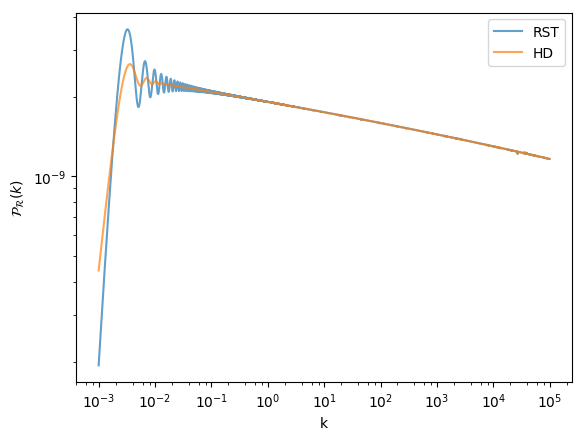

In [6]:
plot_pps(pps1,True)

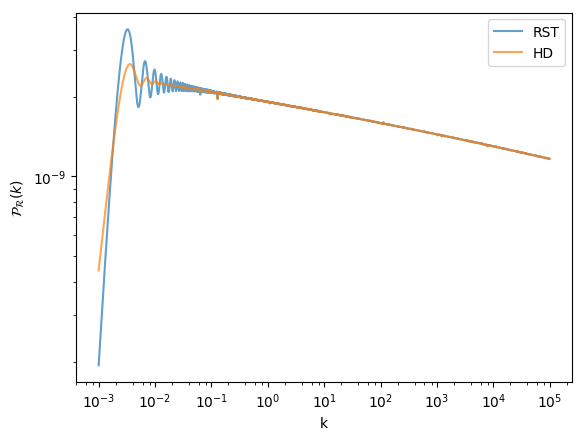

In [7]:
plot_pps(pps2,True)

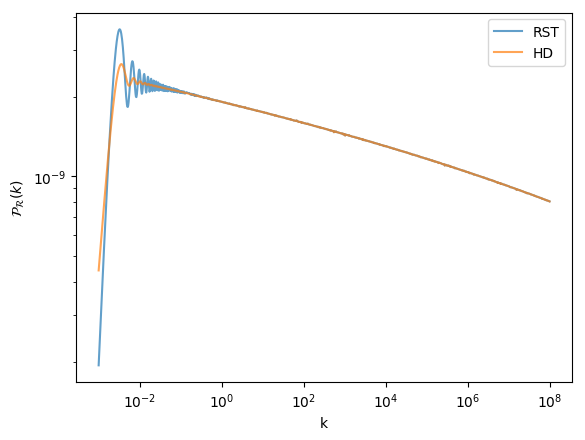

In [8]:
plot_pps(pps3)

## 2. Plot times for the above PPS
 
  - plot these relative to a single k

In [9]:
def plot_time(inputfiles):
    
    data = np.loadtxt(inputfiles[0])
    ks = data[:,0]
    mid = np.abs(ks-(np.sqrt(ks[0]*ks[-1]))).argmin()
    kmid = ks[mid]
    dtmid = data[mid,-1]
    plt.xlabel('k')
    plt.ylabel('elapsed wall clock time (per 2 modes) relative to k={}'.format(kmid))
    plt.axvline(x=kmid)
    if len(inputfiles)>1:
        for f in inputfiles:
            data = np.loadtxt(f)
            plt.loglog(data[:,0], data[:,-1]/dtmid, label=f, alpha=0.5)
        plt.legend()
        plt.show()
    else:
        plt.loglog(data[:,0],data[:,-1]/dtmid,alpha=0.7)
        plt.show()

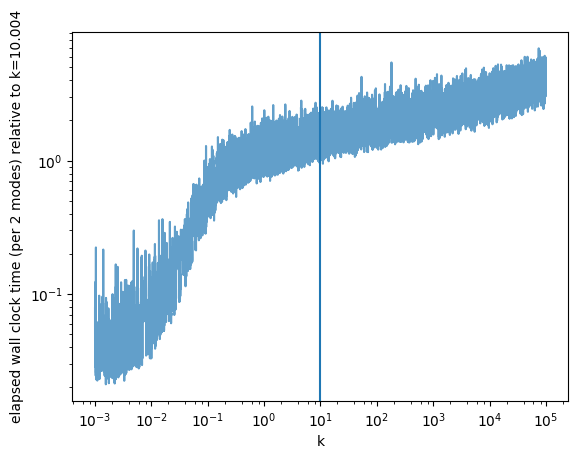

In [10]:
plot_time([pps1])

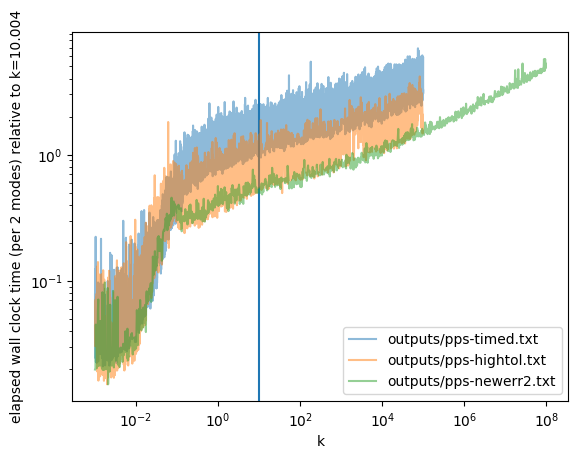

In [11]:
plot_time([pps1,pps2,pps3])

## 3. Scaling of computing time with k

Since we integrate until $k^{-1} \gg (aH)^{-1}$, namely 
$$k^{-1} = 100(aH)^{-1}$$
I expect the computation time to scale up with $k$. The end of integration will be somewhere during inflation, which means $aH$ will go as $e^t$, therefore **computation time should roughly scale as $\log k $.** 

Check this for the green curve above, by only having the k-axis as logarithmic:

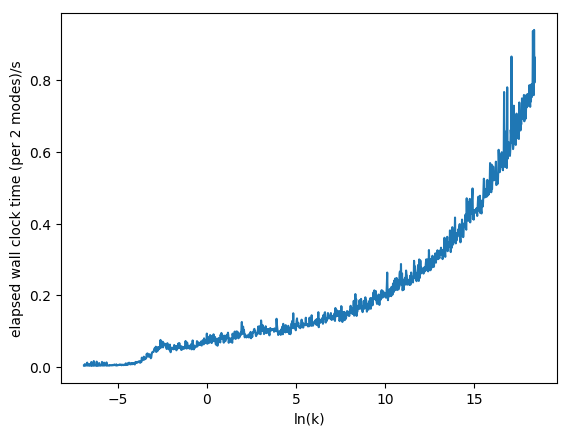

In [36]:
data = np.loadtxt(pps3)
plt.xlabel('ln(k)')
plt.ylabel('elapsed wall clock time (per 2 modes)/s')
plt.plot(np.log(data[:,0]),data[:,-1])
plt.show()

**This is clearly not logarithmic!**

## 4. PPS with NAG

 - PPS4: identical parameters as PPS1 with RKWKB ($rtol=10^{-4}$, $atol=10^{-7}$). 
 - PPS5: tolerance set to $rtol=10^{-7}$.
 - PPS6: tolerance set to $rtol=10^{-8}$.

In [46]:
pps4 = 'outputs/test-pps-nag.txt'
pps5 = 'outputs/test-pps-nag-lowtol.txt'
pps6 = 'outputs/test-pps-nag-lowtol2.txt'
pps7 = 'outputs/test-pps-nag-lowtol3.txt'

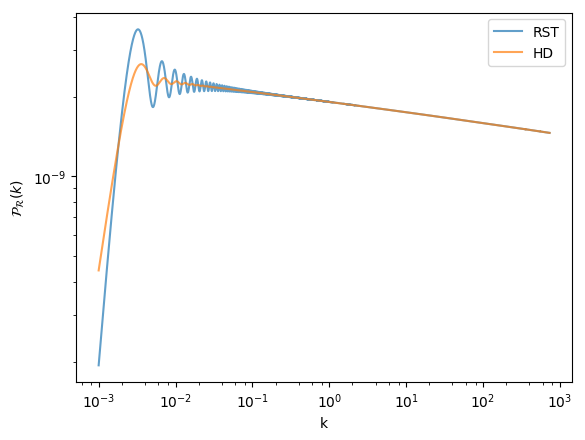

In [47]:
plot_pps(pps6)

In [52]:
#plot_pps(pps7)

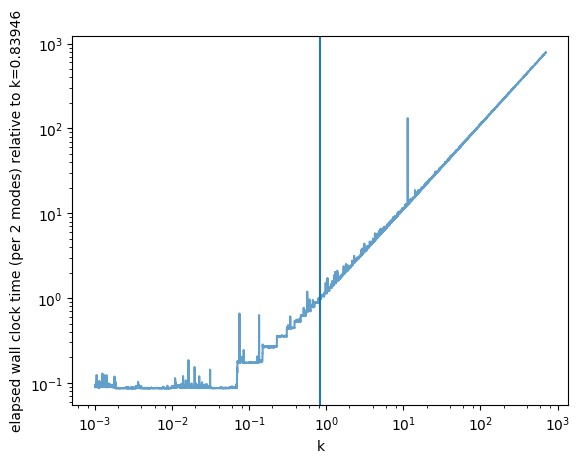

In [43]:
plot_time([pps6])

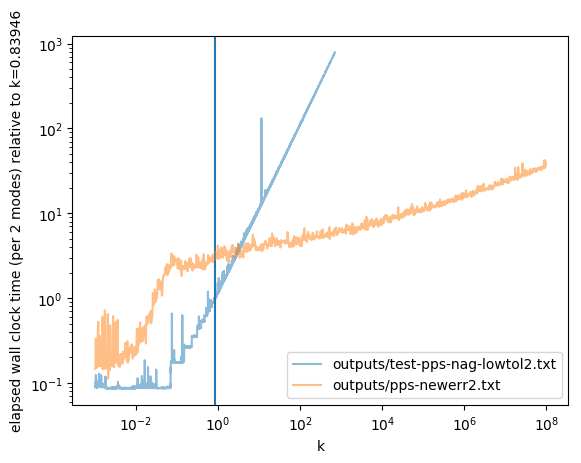

In [44]:
plot_time([pps6,pps3])